<a href="https://colab.research.google.com/github/8johan/ML-PROJ/blob/main/sentiment_classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

yasine lehmiani et osama bensoudan 

**Twitter US Airline Sentiment classification ** 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN, SpatialDropout1D

from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
df=pd.read_csv('/content/Tweets.csv',delimiter=',')
df=pd.DataFrame(df)
df


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

In [ ]:
n0=df.isnull()
n0

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False
1,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False
2,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
4,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,False,False,False,True,False,False,True,False,True,False,False,True,False,True,True
14636,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True
14637,False,False,False,True,True,False,True,False,True,False,False,True,False,False,True
14638,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df=df.drop(['tweet_id','name','user_timezone','tweet_location','tweet_created','tweet_coord','retweet_count','negativereason_gold','negativereason', 'negativereason_confidence','airline_sentiment_gold'],axis=1)

In [ ]:
df

,airline_sentiment,airline_sentiment_confidence,airline,text
0,neutral,1.0000,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...
14635,positive,0.3487,American,@AmericanAir thank you we got on a different f...
14636,negative,1.0000,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,1.0000,American,@AmericanAir Please bring American Airlines to...
14638,negative,1.0000,American,"@AmericanAir you have my money, you change my ..."


In [ ]:
df.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'airline', 'text'], dtype='object')

In [ ]:
print('missing value in airline:',len(n0[n0['airline']==True]))
print('missing value in airline_sentiment:',len(n0[n0['airline_sentiment']==True]))
print('missing value in airline_sentiment_confidence:',len(n0[n0['airline_sentiment_confidence']==True]))


print('missing value in text:',len(n0[n0['text']==True]))


missing value in airline: 0
missing value in airline_sentiment: 0
missing value in airline_sentiment_confidence: 0
missing value in text: 0


In [ ]:
df=df.sample(frac = 0.7)# we take 70% of data for CPU
df.shape

(10248, 4)

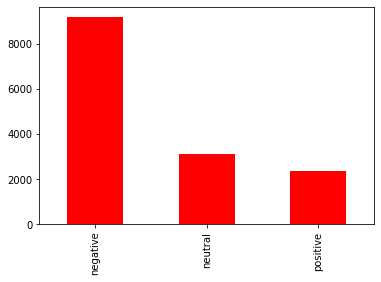

In [ ]:
df['airline_sentiment'].value_counts().plot.bar(color = 'red', figsize = (6, 4))

In [ ]:
df['label']=0
df.loc[df['airline_sentiment'] == 'neutral', 'label'] = 0
df.loc[df['airline_sentiment'] == 'negative', 'label'] = 1
df.loc[df['airline_sentiment'] == 'positive', 'label'] = 2
df

,airline_sentiment,airline_sentiment_confidence,airline,text,label
6163,negative,1.0000,Southwest,@SouthwestAir we've now lost a whole day of ou...,1
12387,positive,1.0000,American,@AmericanAir excellent! Love you guys! If it...,2
8240,negative,1.0000,Delta,@JetBlue what is happening with the flight fro...,1
9074,negative,1.0000,US Airways,@USAirways I will NEVER travel US Airways agai...,1
3630,negative,0.6634,United,@united how long will it take for miles that i...,1
...,...,...,...,...,...
12932,negative,1.0000,American,@AmericanAir im tryin to book a flight but can...,1
7138,neutral,0.6742,Delta,“@JetBlue: Our fleet's on fleek. http://t.co/H...,0
2945,negative,1.0000,United,@united will flight 5559 to YYC be providing f...,1
8156,neutral,1.0000,Delta,@JetBlue @cflanagian she's on to something,0


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

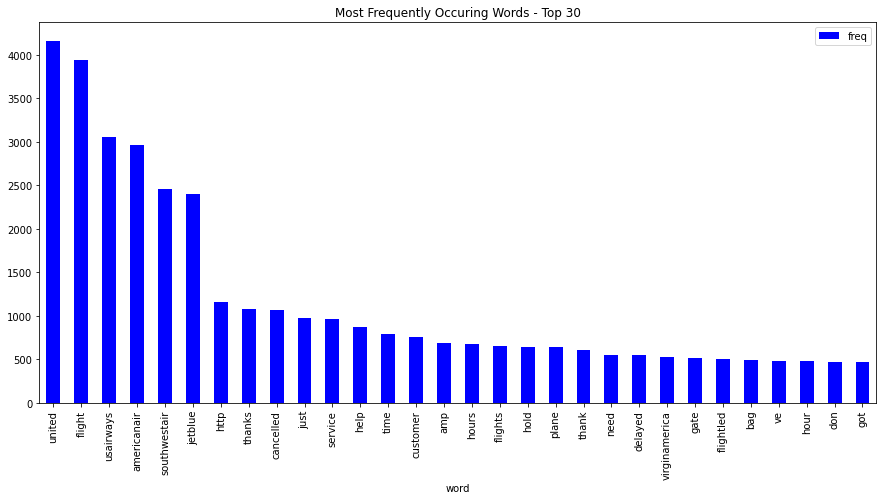

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#pour la visualization 
df_visualis=df
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df_visualis.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

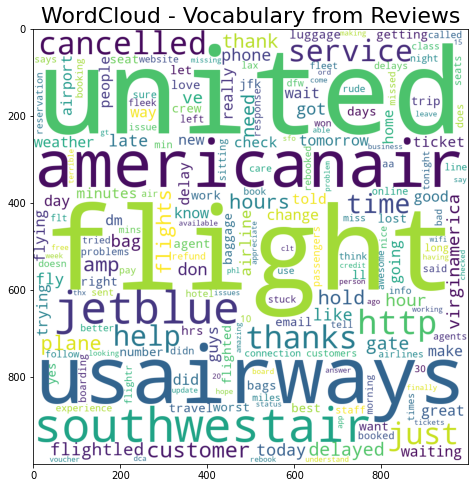

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

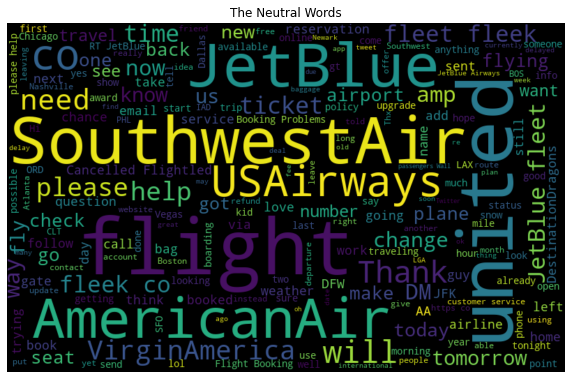

In [ ]:
normal_words =' '.join([text for text in df['text'][df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

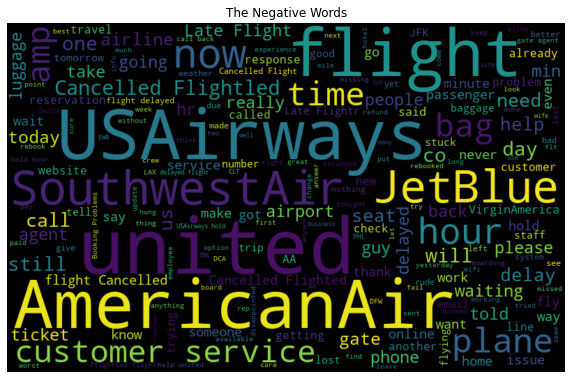

In [ ]:
normal_words =' '.join([text for text in df['text'][df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

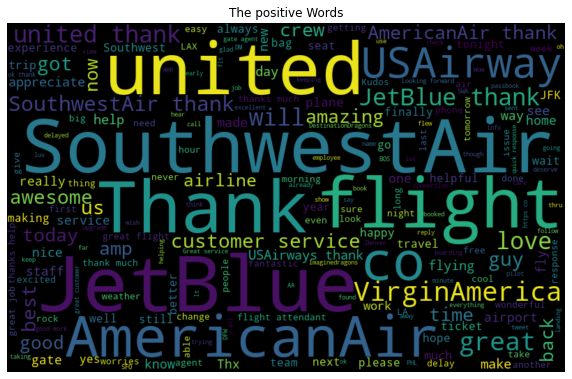

In [ ]:
normal_words =' '.join([text for text in df['text'][df['label'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The positive Words')
plt.show()

In [ ]:
import re

def clean_train_data(x):
    text = x
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) # remove square brackets
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub('\n', '', text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
  
   
    text = re.sub(r"\@", "", text)
    
    return text

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['text'] = df.text.apply(lambda x : clean_train_data(x))
df
df_ml=df

In [ ]:
#we don t remove stop word becouse we wanna classify a sentiment and also the tokinazition becouse we will use the contvectorise
#df_ml['tokenized'] = df_ml.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
df_ml

,airline_sentiment,airline_sentiment_confidence,airline,text,label,tokenized
6163,negative,1.0000,Southwest,southwestair weve now lost a whole day of our ...,1,"[southwestair, weve, now, lost, a, whole, day,..."
12387,positive,1.0000,American,americanair excellent love you guys if it is...,2,"[americanair, excellent, love, you, guys, if, ..."
8240,negative,1.0000,Delta,jetblue what is happening with the flight from...,1,"[jetblue, what, is, happening, with, the, flig..."
9074,negative,1.0000,US Airways,usairways i will never travel us airways again...,1,"[usairways, i, will, never, travel, us, airway..."
3630,negative,0.6634,United,united how long will it take for miles that i ...,1,"[united, how, long, will, it, take, for, miles..."
...,...,...,...,...,...,...
12932,negative,1.0000,American,americanair im tryin to book a flight but cant...,1,"[americanair, im, tryin, to, book, a, flight, ..."
7138,neutral,0.6742,Delta,jetblue our fleets on fleek,0,"[jetblue, our, fleets, on, fleek]"
2945,negative,1.0000,United,united will flight to yyc be providing free f...,1,"[united, will, flight, to, yyc, be, providing,..."
8156,neutral,1.0000,Delta,jetblue cflanagian shes on to something,0,"[jetblue, cflanagian, shes, on, to, something]"


# ***machine learning ***

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
countVect = CountVectorizer(min_df= 10)

binaryVector = countVect.fit_transform(df_ml['text'])

In [ ]:

X=binaryVector
y=df_ml.label 

In [ ]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [ ]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [ ]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  64.21
F1 (RBF Kernel):  52.30


# ***with lstm ***

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
labels = to_categorical(df['label'], num_classes=3)
labels.shape

(10248, 3)

In [ ]:
max_features = 2000
max_len = 130
ms_token = Tokenizer(num_words=max_features)
ms_token.fit_on_texts(df['text'].values)
ms_sequences = ms_token.texts_to_sequences(df['text'].values)
X = pad_sequences(ms_sequences, maxlen=max_len)

In [ ]:
word_index = ms_token.word_index
print('Found %s unique tokens.' % len(word_index))

Found 10782 unique tokens.


In [ ]:
y = labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
embed_dim = 128
lstm_out = 96
ms_model = Sequential()
ms_model.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))#USING WORD EMBEDDING 
ms_model.add(SpatialDropout1D(0.7))
ms_model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
ms_model.add(Dense(3, activation='softmax'))
ms_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

ms_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 130, 128)          256000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 130, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 305,603
Trainable params: 305,603
Non-trainable params: 0
_________________________________________________________________


TRAIN MODEL

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
batch_size = 50
ms_history = ms_model.fit(X_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/20
123/123 [==============================] - 34s 253ms/step - loss: 0.8594 - acc: 0.6345 - val_loss: 0.7125 - val_acc: 0.6938
Epoch 2/20
123/123 [==============================] - 40s 325ms/step - loss: 0.7292 - acc: 0.6804 - val_loss: 0.6400 - val_acc: 0.7360
Epoch 3/20
123/123 [==============================] - 38s 311ms/step - loss: 0.6578 - acc: 0.7251 - val_loss: 0.5856 - val_acc: 0.7711
Epoch 4/20
123/123 [==============================] - 40s 322ms/step - loss: 0.5981 - acc: 0.7537 - val_loss: 0.5498 - val_acc: 0.7828
Epoch 5/20
123/123 [==============================] - 34s 271ms/step - loss: 0.5622 - acc: 0.7720 - val_loss: 0.5254 - val_acc: 0.7874
Epoch 6/20
123/123 [==============================] - 30s 246ms/step - loss: 0.5300 - acc: 0.7868 - val_loss: 0.5189 - val_acc: 0.7828
Epoch 7/20
123/123 [==============================] - 30s 248ms/step - loss: 0.5088 - acc: 0.7980 - val_loss: 0.5135 - val_acc: 0.7971
Epoch 8/20
123/123 [==============================] - 3

In [ ]:
loss, accuracy = ms_model.evaluate(X_test, y_test)
print("loss", loss)
print("accuracy", accuracy)

81/81 [==============================] - 2s 24ms/step - loss: 0.5379 - acc: 0.7966
loss 0.5379202961921692
accuracy 0.7966432571411133


In [ ]:
text1 = ['i would recommend ']
text2=['it a bad service']
text1 =ms_token.texts_to_sequences(text1)
text2 =ms_token.texts_to_sequences(text2)
text1 = pad_sequences(text1, maxlen=max_len)
text2 = pad_sequences(text2, maxlen=max_len)
res1 = ms_model.predict(text1)
res2 = ms_model.predict(text2)
res1
res2

array([[0.43645102, 0.47968853, 0.08386048]], dtype=float32)

In [ ]:
def sentiment(res):
  if np.argmax(res) == 0:
    print("neutral Comment")
  elif np.argmax(res) == 1:
    print("Negetive Comment")
  elif np.argmax(res) == 2:
    print("positive Comment")


In [ ]:
sentiment(res1)
sentiment(res2)

neutral Comment
Negetive Comment


# Nouvelle section